# Facebook message analysis 

In [3]:
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd 
%matplotlib inline

Convert all data to numeric values for easy processing:

In [4]:
name = 'sample_oneonone'

In [5]:
# Read and process data in one block to avoid not working blocks
thread = pd.read_csv('../results/{}.csv'.format(name),sep=',', engine='python')
# Convert months to numeric data
thread['month'] = thread['month'].str.strip().map(
    {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
    }
)
thread['day'] = pd.to_numeric(thread['day'])
thread['year'] = pd.to_numeric(thread['year'])
# Group the data based on both month and year for chronological display
sorted = thread[['year','month']].sort_values(['year', 'month'], ascending=[True, True])
sorted_group = sorted.groupby(['year','month']).size().reset_index(name='counts')

In [6]:
sorted_group['month'] = sorted_group['month'].map(
{
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
})
sorted_group["period"] = sorted_group["month"] + " " + sorted_group["year"].map(str)

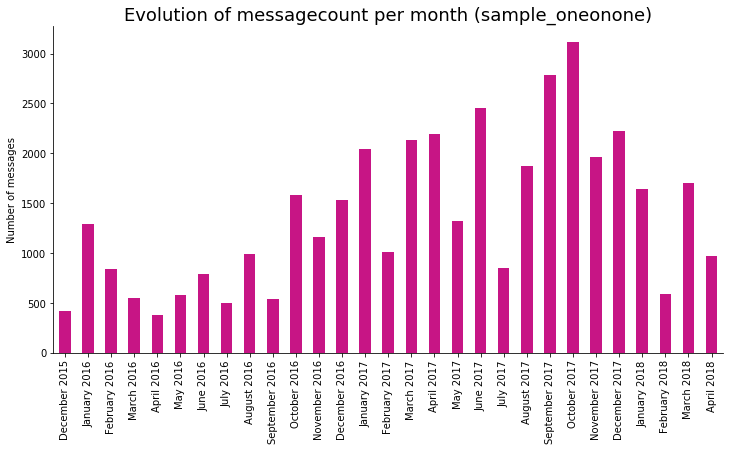

In [14]:
fig, ax = plt.subplots(1)
ax = sorted_group['counts'].plot.bar(figsize=(12,6), color='mediumvioletred', edgecolor='none')
ax.set_xticklabels(
    sorted_group["period"]
)
sns.despine()
ax.set_ylabel("Number of messages")
ax.set_title("Evolution of messagecount per month ({})".format(name), fontsize=18)

fig.savefig('../results/{}.png'.format(name), bbox_inches='tight')